In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from ast import literal_eval
import datetime


def read_group(file_name , groups_folder= "../plots/groups/"):
    groups = pd.read_csv(f"{groups_folder}{file_name}",index_col=0)
    groups.drop(["size","depth"],axis=1,inplace=True)
    groups["itemsets"] = groups["itemsets"].apply(lambda x : [int(i) for i in x.split()])
    groups.period = pd.to_datetime(groups.period)
    groups["user_ids"] = groups["user_ids"].apply(lambda x : [int(i) for i in x[1:-1].split(",")])
    groups["itemset_name"] = groups["itemset_name"].apply(lambda x : [i.strip() for i in x[1:-1].split(",")])
    return groups

def splited_links(file_name):
    links = pd.read_csv(f"../plots/links/{file_name}")
    groups = read_group(file_name)[["period","itemset_name","itemsets"]]
    links = links.merge(groups,left_on="source",right_index=True).merge(groups,left_on="target",right_index=True)
    links.user_id = links.user_id.apply(lambda x : list(x.split(","))) 
    links.period_y= pd.to_datetime(links.period_y).dt.date
    links.period_x= pd.to_datetime(links.period_x).dt.date
    
    return links
def count_consecutives(x):
    return x.groupby((x!=x.shift()).cumsum()).transform("size")

def read_users_file():
    users = pd.read_csv("../datasets/Total/users.csv",sep=";")
    users.columns =columns=["user_id","sex","age","departement"]
    return users 
def interest_gain(x,product_id,target_users,links):
    users = target_users.intersection(x["user_id"])
    period  = x["period_x"]                                                      
    
    if product_id not in x["itemsets_y"] or users==set():
        return [False]
    
    output = []
    for user in users:
        res = links[links.apply(lambda x : user in x["user_id"] and period==x["period_x"],axis=1)]["itemsets_x"].sum()
        if res ==0:
            res = [0]
        output.append(product_id not in res)
    return output

users = read_users_file()

<IPython.core.display.Javascript object>


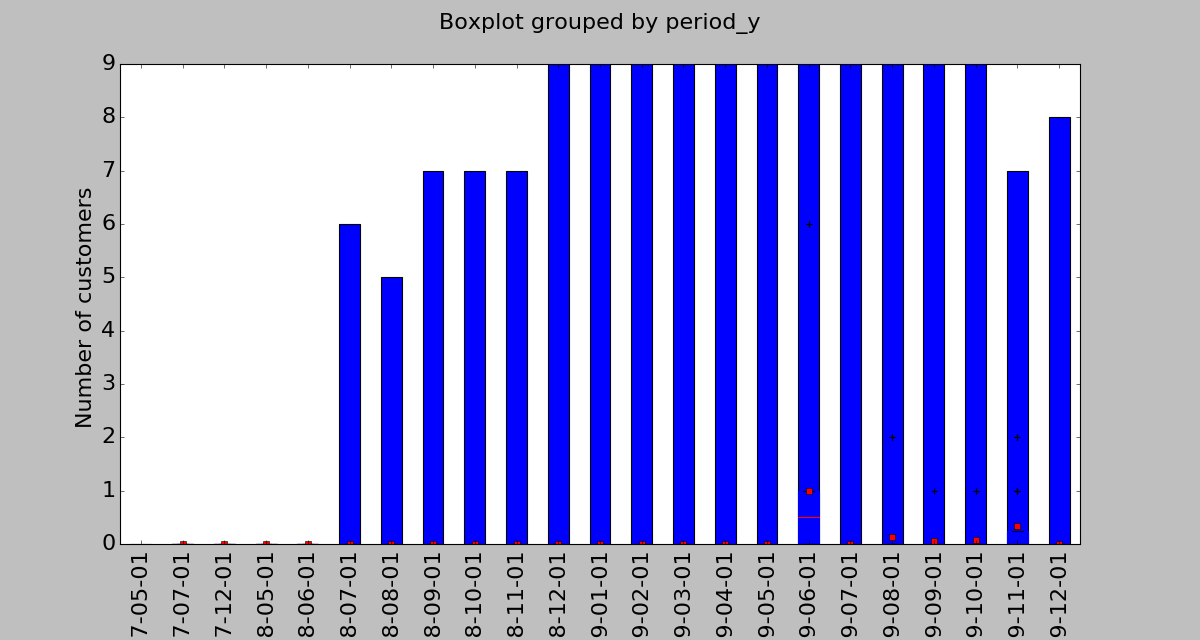

In [18]:
file_name = "M-2-[1-None]-[AGE]-lcm.out"
file = file_name.split('-')[0]

# Customers C and product p 
product_id = 1538
product_name= "RECHARGE CAFÉ CLUB 2x80"

customers  = frozenset([str(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])
target_users = customers

links = splited_links(file_name)
links = links[links.user_id.apply(lambda x : any(i in x for i in target_users))]
links.period_y= pd.to_datetime(links.period_y).dt.date
# links.groupby("period")["user_id"].plot.bar()
# Interest gain query 
links["interest_gain"] = links.apply(lambda x : interest_gain(x,product_id,target_users,links),axis=1)
links["interest_gain"] = links["interest_gain"].apply(lambda x : len([i for i in x if i is True]) )
# # Drift computation 
## Box plot 
ax = links.boxplot(column='interest_gain',by="period_y",rot=90,showmeans=True,grid=False,figsize=(15,8))
ax.set_xlabel("Time period")
ax.set_ylabel("Subset size")
ax.set_title('Basic Plot')
plt.title(f'Figure 1: Subsets of C satisfying Interest gain for {product_name} ',y=-0.3)
plt.rcParams.update({'font.size': 14})

In [65]:

customers  = frozenset([str(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])
target_users = customers

customers = set([int(i) for i in customers])
groups = read_group(file_name)
groups["customers"] = groups.user_ids.apply(lambda x : list(customers.intersection(x)))
groups.period= groups.period.dt.date
ax = groups[groups.itemsets.apply(lambda x : product_id in x )].groupby('period').customers.sum().apply(set).apply(len).plot.bar(figsize=(15,8))
ax.set_title(f"Figure 1: Customers interest for {product_name}")
ax.set_ylabel("Number of customers ")

Text(0.05988021618668058, -0.048450867156172354, 'Number of customers ')

In [72]:
def interest_gain(x,product_id,target_users,links):
    users = target_users.intersection(x["user_id"])
    period  = x["period_x"]                                                      
    
    if product_id not in x["itemsets_y"] or users==set():
        return [False]
    print(period)
    output = []
    for user in users:
        print(user)
        res = links[links.apply(lambda x : user in x["user_id"] and period==x["period_x"],axis=1)]["itemsets_x"].sum()
        if res ==0:
            res = [0]
        print(res)
        output.append(product_id not in res)
    return output


links["size"] = links.user_id.apply(lambda x: customers.intersection(x)).apply(len)
links = links [links.itemsets_y.apply(lambda x : 1538 in x)]
a = links[links.period_y== links.period_y.max()]
a[a["size"]==a["size"].max()].apply(lambda x : interest_gain(x,product_id,target_users,links),axis=1)

/home/abdelouahab/3env/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538, 1538, 163, 1538, 4112]
2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538, 1538, 163, 1538, 4112]
2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538, 1538, 163, 1538, 4112]
2019-11-01
427096
[1538, 1538, 163]
751640
[1538, 1538, 163, 1538, 1538, 163]
421137
[1538, 1538, 163, 1538, 1538, 163]
957469
[1538, 1538, 163]
156634
[1538, 1538, 163, 1538, 1538, 163]
1095891
[1538, 1538, 163, 454, 1538, 163]
1168767
[1538, 1538, 163]
2019-11-01
427096
[1538, 1538, 163]
751640
[1538, 1538, 163, 1538, 1538, 163]
421137
[1538, 1538, 163, 1538, 1538, 163]
957469
[1538, 1538, 163]
156634
[1538, 1538, 163, 1538, 1538, 163]
1095891
[1538, 1538, 163, 454, 1538, 163]
1168767
[1538, 1538, 163]
2019-11-01
1095891
[1538, 1538, 163, 454, 1538, 163]
2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538, 1538, 163, 1538, 4112]
2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538, 1538, 163, 1538, 4112]
2019-10-01
114666
[1538, 1538, 163, 1538, 4112, 1538

382332                                              [False]
383140                                              [False]
393187                                              [False]
398653                                              [False]
399648                                              [False]
403593                                              [False]
403608                                              [False]
403616                                              [False]
406428                                              [False]
407226    [False, False, False, False, False, False, False]
407241                                              [False]
407251    [False, False, False, False, False, False, False]
407588                                              [False]
404549                                              [False]
404561                                              [False]
404594                                              [False]
405744                                  

In [79]:
e = groups[(groups.period==groups.period.max())&(groups.itemsets.apply(lambda x : 1538 in x ))]
e["customers"] = e.user_ids.apply(lambda x : len(customers.intersection(x)))
a

/home/abdelouahab/3env/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,source,target,user_id,period_x,itemset_name_x,itemsets_x,period_y,itemset_name_y,itemsets_y,size
382332,27896,32181,[531587],2019-07-01,"['CADEAU JAUGE TR', 'RECHARGE CAFÉ CLUB 2\x80']","[4149, 1538]",2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
383140,27964,32181,[531587],2019-07-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
393187,29256,32181,[587513],2019-08-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
398653,30074,32181,[1206265],2019-09-01,['RECHARGE CAFÉ CLUB 2\x80'],"[1538, 163]",2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
399648,30128,32181,[1206265],2019-09-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
403593,30753,32181,"[114666, 758478]",2019-10-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
403608,30754,32181,[114666],2019-10-01,['RECHARGE CAFÉ CLUB 2\x80'],"[1538, 163]",2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
403616,30755,32181,[114666],2019-10-01,"['LAVAGE CLU', 'RECHARGE CAFÉ CLUB 2\x80']","[1538, 4112]",2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
406428,31349,32181,"[109730, 446043]",2019-11-01,"['CADEAU JAUGE TR', 'RECHARGE CAFÉ CLUB 2\x80']","[4149, 1538]",2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0
407226,31455,32181,"[109730, 110899, 144223, 146208, 156634, 30899...",2019-11-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],2019-12-01,['RECHARGE CAFÉ CLUB 2\x80'],[1538],0


In [58]:
customers  = frozenset([int(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])

set(groups[(groups.period==datetime.date(2019,11,1))&(groups.itemsets.apply(lambda x : 1538 in x ))].user_ids.apply(sum).tolist())

{431745,
 536254,
 708745,
 966929,
 1041135,
 1341245,
 1567378,
 1814658,
 1843588,
 2151927,
 2333693,
 5403355,
 5759257,
 10856348,
 17689421,
 30820393}

In [63]:
groups

,user_ids,support,itemsets,period,property_values,AGE,itemset_name,customers
0,"[179586, 693719]",2,[0],2017-02-01,35-49,35-49,[],[]
1,"[453036, 519887]",2,"[1378, 264]",2017-03-01,50-65,50-65,"['BD PAIN RAISIN', 'REMISE BUS AUTOROUTE 15\x80']",[]
2,"[428202, 453036]",2,[1394],2017-03-01,50-65,50-65,['BD DOUBLE EXPRE'],[]
3,"[200853, 263990, 304549]",3,"[1464, 1523]",2017-03-01,50-65,50-65,"['BDG EXPRESSO', 'BDG STEACK HACHE FRITES']",[]
4,"[263990, 304549]",2,"[1464, 1462, 1523]",2017-03-01,50-65,50-65,"['BDG ENTREE TOMATE OEUFS', 'BDG EXPRESSO', 'B...",[]
...,...,...,...,...,...,...,...,...
32420,"[334634, 1229615]",2,[4556],2019-12-01,35-49,35-49,[],[]
32421,"[363089, 1099079]",2,[5309],2019-12-01,35-49,35-49,['GAUFRETTES AU B'],[]
32422,"[967217, 1109496]",2,[5482],2019-12-01,35-49,35-49,['RITTER BLANC NU'],[]
32423,"[410463, 617055, 1235206]",3,[4145],2019-12-01,35-49,35-49,['BUS AUTOROUTE R'],[]


In [80]:
file_name = "45D-3-[1-None]-[AGE]-lcm.out"
a = pd.DataFrame()

for i in ["M","2M","3M"]:
    file_name  = "{}-2-[1-None]-[AGE]-lcm.out".format(i)
    file = file_name.split('-')[0]
    # Customers C and product p 
    product_id = 1538
    product_name= "RECHARGE CAFÉ CLUB 2x80"

    customers  = frozenset([str(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])
    target_users = customers


    links = splited_links(file_name)
    links = links[links.user_id.apply(lambda x : any(i in x for i in target_users))]
    links.period_y= pd.to_datetime(links.period_y).dt.date
    # links.groupby("period")["user_id"].plot.bar()
    # Interest gain query 
    links["interest_gain"] = links.apply(lambda x : interest_gain(x,product_id,target_users,links),axis=1)
    links["interest_gain"] = links["interest_gain"].apply(lambda x : len([i for i in x if i is True])/len(target_users) )
    
    
    # For 3D print 
    stats = links.groupby("period_y").interest_gain.max()
    stats_2 = stats.copy()
    stats_2 = stats_2.to_frame().reset_index()
    stats_2["granularity"] = file
    stats_2["dz"] = stats_2["interest_gain"]
    a = pd.concat([a,stats_2])
#     fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,8))
#     threshold = 0.5
#     ax.set_ylabel("Interest gain drift value")
#     plt.title("Figure 2 : Difference in drift value for consecutive periods")

#     stats = stats - stats.shift()
#     ax = (stats - stats.shift()).plot.bar(rot=90,figsize=(18,5))

#     ax.axhline(threshold, color='red', linestyle=':')
#     ax.axhline(-threshold, color='red', linestyle=':')
#     ax.plot()
#     #     ax[idx].set_title(f"[{name}] - Customers drift evolution (interest gain) for RECHARGE CAFÉ CLUB 2x80 ")
#     fig.tight_layout(pad=0.2)

#     # plt.title('Figure 1: Boxplots for subsets of C satisfying Interest gain for RECHARGE CAFÉ CLUB 2x80 ',y=-2)
#     plt.rcParams.update({'font.size': 14})


2018-07-01
156634
[4143]
2018-09-01
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-09-01
427096
[1538, 1538, 1538]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-09-01
114666
[163, 1538, 1538, 163, 163, 1538,

[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1095891
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1168767
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
2019-05-01
427096
[1538, 163, 163, 1538, 4280, 1538, 163, 163, 1538, 4280, 1538, 163, 163, 1538, 4280, 1538, 163, 163, 1538, 4280]
2018-06-01
1095891
[163, 163, 163, 163, 163, 163, 163]
2018-06-01
427096
[163, 163, 163]
114666
[163, 163, 163, 163, 163, 163, 163]
751640
[163, 163, 163]
957469
[163, 2968, 2968, 163, 163, 2968, 2968, 163, 163, 2968, 2968, 163]
616689
[163, 163, 163]
1095891
[163, 163, 163, 163, 163, 163, 163]
2018-06-01
957469
[163, 2968, 2968, 163, 163, 2968, 2968, 163, 163, 2968, 2968, 163]
2018-06-01
957469
[163, 2968, 2968, 163, 163, 2968, 2968, 163, 163, 2968, 2968, 163]
2019-07-01
751640
[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163

[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159]
616689
[1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163]
2019-07-01
751640
[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 

[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159]
616689
[1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163]
2019-07-01
751640
[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163]
616689
[163, 163, 163, 163]
1095891
[163, 1538, 1538, 163, 1622, 163, 1538, 1538, 163, 1622, 163, 1538, 1538, 163, 1622]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-10-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163]
156634
[1538, 1538, 1538]
1095891
[163, 1538, 1538, 163, 1622, 163, 1538, 1538, 163, 1622, 163, 1538, 1538, 163, 1622]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-10-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 16

[2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[1855, 1855, 1538, 163, 1538, 1538, 163, 1855, 1855, 1538, 163, 1538, 1538, 163, 1855, 1855, 1538, 163, 1538, 1538, 163]
421137
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
616689
[1532, 1532, 1538, 163, 1538, 1538, 163, 4149, 1532, 1532, 1538, 163, 1538, 1538, 163, 4149, 1532, 1532, 1538, 163, 1538, 1538, 163, 4149]
156634
[163, 15

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-12-01
421137
[4149, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 4149, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 4149, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 1538, 1538, 4112, 1538, 163]
2018-12-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
421137
[4149, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 4149, 

[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163

[1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163]
2019-02-01
421137
[1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163, 1538, 163, 163, 1538, 4074, 4074, 1538, 4074, 163]
2019-02-01
114666
[608, 1615, 1538, 163, 163, 1538, 608, 1615, 1615, 163]
2019-02-01
114666
[608, 1615, 1538, 163, 163, 1538, 608, 1615, 1615, 163]
2019-02-01
114666
[608, 1615, 1538, 163, 163, 1538, 608, 1615, 1615, 163]
2019-02-01
427096
[1538, 163, 163, 1538, 1710, 386, 1538, 163, 163, 1538, 1710, 386, 1538, 163, 163, 1538, 1710, 386, 1538, 163, 163, 1538, 1710, 386]
2018-08-01
1168767
[3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2

[163, 163, 163]
616689
[163, 1538, 1538, 163, 3899, 163, 1538, 1538, 163, 3899, 163, 1538, 1538, 163, 3899]
156634
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-11-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
616689
[163, 1538, 1538, 163, 3899, 163, 1538, 1538, 163, 3899, 163, 1538, 1538, 163, 3899]
156634
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[1622, 1538, 1715, 1622, 1538, 1715, 1622, 1538, 1715]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-11-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[163, 1538, 1538, 163, 163, 1538, 1538, 

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112]
2019-08-01
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538

[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
751640
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1168767
[3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274, 3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274, 3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274]
2018-08-01
114666
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
751640
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1168767
[3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274, 3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274, 3643, 3643, 2317, 4921, 1538, 163, 1538, 2317, 1538, 2317, 163, 3274, 3643, 2317, 3274]
2018

[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4

[163, 1538, 1538, 163, 2723, 163, 1538, 1538, 163, 2723, 163, 1538, 1538, 163, 2723]
114666
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 153

[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
156634
[1538, 4074, 4074, 1538, 1538, 4074, 4074, 1538, 1538, 4074, 4074, 1538]
1095891
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1168767
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
2019-03-01
751640
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
421137
[1538, 163, 163, 1538, 4074, 4074, 1538, 1538, 163, 163, 1538, 4074, 4074, 1538, 1538, 163, 163, 1538, 4074, 4074, 1538]
957469
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
616689
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1095891
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1168767
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
2019-03-01
751640
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
421137
[1538, 163, 163, 1538, 4074, 4074, 1538, 1538, 163, 163, 1538, 4074, 4074, 1538, 1538, 163, 163, 153

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2019-06-01
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
751640
[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163,

[1532, 1532, 1538, 163, 1538, 1538, 163, 4149, 1532, 1532, 1538, 163, 1538, 1538, 163, 4149, 1532, 1532, 1538, 163, 1538, 1538, 163, 4149]
156634
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2019-01-01
1095891
[1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1622, 1622, 4112, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112]
2019-01-01
427096
[2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1538, 163, 163, 1538, 1538, 163, 2369, 2369, 1

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
421137
[163, 1538, 163, 1538]
957469
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
616689
[4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538]
156634
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1095891
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1168767
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-09-01
616689
[4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538]
2019-09-01
427096
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
114666
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 

[4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326, 4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326, 4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326]
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112]
2019-08-01
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 1

[4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326, 4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326, 4149, 4149, 1538, 4149, 1538, 163, 163, 1538, 1538, 163, 2326]
2019-08-01
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112]
2019-08-01
1168767
[4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4159, 4159, 4112, 454, 6907, 6907, 1538, 4112, 4149, 4149, 4112, 4149, 1538, 4149, 1538, 4112, 41

[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159]
2019-07-01
957469
[1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 5490, 1795, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 5490, 1795, 1538, 4157, 1538, 4157, 163, 1538, 4157, 163, 1538, 163, 4157, 163, 5490, 1795]
751640
[4159, 4157, 4156, 

[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
2019-07-01
751640
[4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 4157, 163, 1538, 4156, 163, 1538, 163, 4159, 163, 4157, 163, 4156, 163, 1538, 4159, 4157, 4156, 1538, 4159, 4159, 4157, 4156, 4159, 4157, 4159, 4156, 4159, 1538, 4157, 1538, 4156, 1538, 4157, 4156, 4157, 4156, 163, 1538, 4159, 163, 1538, 

[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2019-06-01
751640
[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 41

[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4

[2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4149, 1538, 6069, 6671, 163, 1538, 1538, 163, 2547, 4149, 4

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
114666
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
957469
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
616689
[4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538]
156634
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1095891
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1168767
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-09-01
616689
[4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538, 4112, 163, 1538, 4112, 1538, 163, 1538, 163, 4112, 1538]
2019-09-01
427096
[163, 1538, 

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-09-01
1168767
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-09-01
1168767
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-10-01
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2019-10-01
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2019-10-01
1095891
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-06-01
156634
[4143, 4143, 4143]
2018-08-01
1168767
[3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317,

[4074, 163, 1538, 163, 1538, 4074, 1538, 4074, 163, 4074, 163, 1538, 4074, 163, 1538, 163, 1538, 4074, 1538, 4074, 163, 4074, 163, 1538, 4074, 163, 1538, 163, 1538, 4074, 1538, 4074, 163, 4074, 163, 1538]
2019-02-01
957469
[1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112, 1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112, 1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112]
2019-02-01
427096
[3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386]
114666
[163, 1538, 163, 1538,

[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156

[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156

[163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156]
2019-06-01
427096
[1538, 1538, 163, 163, 2255, 2723, 1538, 1538, 163, 163, 2255, 2723, 1538, 1538, 163, 163, 2255, 2723]
114666
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
751640
[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6

[1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163]
957469
[1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1795, 5490, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1795, 5490, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1795, 5490]
616689
[1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163, 1538, 1538, 163, 4157, 163, 4157, 163, 4157, 1538, 4157, 1538, 163]
156634
[4159, 4159, 163, 4159, 1538, 4159, 1538, 163, 1538, 153

[1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163]
2019-06-01
421137
[1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163, 1538, 1538, 163, 163, 4158, 4158, 163, 4158, 1538, 4158, 1538, 163]
2019-06-01
427096
[1538, 1538, 163, 163, 2255, 2723, 1538, 1538, 163, 163, 2255, 2723, 1538, 1538, 163, 163, 2255, 2723]
2019-06-01
751640
[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547

[1538, 1538, 4921, 1538, 163, 1538, 163, 4921, 4921, 163, 163, 4921, 1538, 1538, 4921, 1538, 163, 1538, 163, 4921, 4921, 163, 163, 4921, 1538, 1538, 4921, 1538, 163, 1538, 163, 4921, 4921, 163, 163, 4921]
751640
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
957469
[1538, 1538, 163, 1538, 2968, 1538, 2968, 163, 2968, 163, 163, 2968, 1538, 1538, 163, 1538, 2968, 1538, 2968, 163, 2968, 163, 163, 2968, 1538, 1538, 163, 1538, 2968, 1538, 2968, 163, 2968, 163, 163, 2968]
616689
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
1095891
[1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142, 1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142, 1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142]
2018-06-01
1095891
[1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142, 1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142, 1538, 1538, 4142, 1538, 163, 1538, 163, 4142, 4142, 163, 163, 4142

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
957469
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
616689
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
156634
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1095891
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1168767
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-04-01
427096
[163, 1538, 163, 1538, 1710, 386, 4280, 163, 1538, 163, 153

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[163, 163, 163, 163, 163, 163, 163]
2018-04-01
114666
[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797,

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
2019-10-01
427096
[1538, 163, 1538, 163]
114666
[1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
751640
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
421137
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
957469
[1538, 163, 1538, 163]
156634
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1538, 163, 1538, 163, 454, 454, 1538, 163, 5845, 1538, 163, 1538, 163, 454, 454, 1538, 163, 5845]
1168767
[4149, 163, 1538, 4149, 1538, 1538, 163, 1538, 163]
2019-10-01
114666
[1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
2019-10-01
427096
[1538, 163, 1538, 163]
114666
[1538

[4149, 1538, 163, 4149, 1538, 4149, 1538, 163, 1538, 163, 1532, 1538, 1532, 163, 1532, 4149, 1538, 163, 4149, 1538, 4149, 1538, 163, 1538, 163, 1532, 1538, 1532, 163, 1532, 4149, 1538, 163, 4149, 1538, 4149, 1538, 163, 1538, 163, 1532, 1538, 1532, 163, 1532]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 153

[1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1622, 4112, 1622, 452, 1622, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1622, 4112, 1622, 452, 1622, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1622, 4112, 1622, 452, 1622]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 

[163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156]
2019-06-01
1095891
[163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156]
2018-10-01
616689
[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163]
2018-10-01
1095891
[1622, 16

[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163]
156634
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715]
1168767
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
2018-10-01
427096
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
114666
[15

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
156634
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-04-01
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163,

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 553

[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 553

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 6855, 6855, 5951, 3876, 3876, 5842, 5951, 163, 2797, 5842, 5842, 2797, 5842, 2797, 163, 6969, 6969, 5951, 6969, 163, 6969, 163, 5951, 6969, 2797, 6969, 2797, 5951, 163, 163, 5951, 5951, 2797, 2797, 5951, 2797, 163, 6855, 2797, 5951, 6855, 6969, 5951, 6855, 2797, 

[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163]
2018-10-01
1095891
[1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715, 1622, 163, 1622, 1538, 163, 1538, 163, 1715]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952, 6014, 5952, 6014, 5531, 5952, 5531, 163, 163, 5952, 5952]
2018-04-01
957469
[6014, 5952, 6014, 5531, 5

[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
2018-12-01
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 41

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
421137
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
957469
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
616689
[1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
156634
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156]
1168767
[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 69

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163]
2018-08-01
1168767
[3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163]
2018-08-01
1168767
[3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163, 3643, 3643, 2317, 3274, 3643, 2317, 3274, 4921, 2317, 2317, 1538, 2317, 163, 1538, 163, 1538, 163]
2018-08-01
427096
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538,

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-02-01
957469
[1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112, 1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112, 1622, 721, 1622, 721, 1538, 721, 163, 1538, 4112, 163, 1538, 163, 4112, 163, 1538, 4112, 1538, 4112]
2019-02-01
427096
[3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 163, 1538, 3510, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386]
114666
[163, 1538, 163, 1538, 608, 1615, 608, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 1615, 608, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 1615, 608, 1615, 1615,

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-04-01
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
1095891
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
201

[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163]
2018-10-01
616689
[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163]
2018-10-01
616689
[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163]
2018-10-01
616689
[3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1538, 163, 3899, 1538, 163, 1

[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
2018-12-01
427096
[2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369

[1855, 1538, 1855, 1538, 163, 1538, 163, 1772, 1855, 1538, 1855, 1538, 163, 1538, 163, 1772, 1855, 1538, 1855, 1538, 163, 1538, 163, 1772]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 41

[2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163]
2018-12-01
427096
[2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163, 2369, 1538, 163, 2369, 1538, 163, 1538, 163]
2018-12-01
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 153

[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149

[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156

[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156

[4159, 4159, 163, 4159, 1538, 4159, 1538, 163, 1538, 1538, 163, 163, 4159, 4159, 163, 4159, 1538, 4159, 1538, 163, 1538, 1538, 163, 163, 4159, 4159, 163, 4159, 1538, 4159, 1538, 163, 1538, 1538, 163, 163]
1095891
[163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156]
1168767
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 16

[163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 163, 4156]
2019-06-01
751640
[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 41

[4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156, 4157, 4156, 4157, 163, 4157, 1538, 4157, 1538, 163, 4537, 6069, 6671, 4149, 4149, 1538, 4149, 1538, 163, 4149, 4157, 1538, 4149, 4159, 1538, 2547, 2547, 4159, 4156, 4157, 4159, 4159, 4156, 4159, 163, 4159, 1538, 4159, 1538, 163, 4159, 4157, 4159, 4157, 4156, 4159, 4157, 1538, 4156, 163, 4156, 1538, 1538, 4156, 1538, 163, 1538, 163, 4156, 4157, 163, 4156

[1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326]
751640
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
421137
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
957469
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
616689
[1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112]
156634
[1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163]
1095891
[1538, 163, 1538, 163, 4156, 1538, 4156

[1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156, 1538, 163, 1538, 163, 4156, 1538, 4156]
1168767
[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 414

[1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326, 1538, 163, 1538, 163, 4149, 1538, 163, 4149, 1538, 4149, 163, 4149, 2326]
1168767
[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 411

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-04-01
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
156634
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019

[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
2019-06-01
114666
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
1168767
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 153

[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163]
2019-06-01
1168767
[1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538,

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 4149, 163, 4149, 4112, 4149, 6907, 1538, 4112, 6907, 4159, 163, 4159, 4112, 4159, 454, 163, 454, 4112, 454, 1538, 163, 4112, 1538, 163, 1538, 4112, 1538, 163, 4112, 163, 4112, 4149, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 163, 4112, 

[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721,

[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721,

[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721,

[1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615]
2019-02-01
957469
[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1

[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
156634
[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
421137
[163, 1538, 4074, 407

[1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615, 1615, 1615, 163, 163, 1538, 163, 1538, 608, 608, 1615]
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
421137
[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1

[2461, 4143, 2461, 5951, 2461, 5951, 4143, 4143, 5951]
2018-05-01
156634
[2461, 4143, 2461, 5951, 2461, 5951, 4143, 4143, 5951]
2018-05-01
156634
[2461, 4143, 2461, 5951, 2461, 5951, 4143, 4143, 5951]
2018-05-01
957469
[6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163]
2018-05-01
957469
[6014, 2968, 6014, 5952, 6014, 5531, 1538, 59

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
114666
[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951]
751640
[2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 296

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[4142, 163, 4142, 163, 1538, 1538, 4142, 163, 1538, 4142, 1538, 163, 4142, 163, 4142, 163, 1538, 1538, 4142, 163, 1538, 4142, 1538, 163, 4142, 163, 4142, 163, 1538, 1538, 4142, 163, 1538, 4142, 1538, 163, 4142, 163, 4142, 163, 1538, 1538, 4142, 163, 1538, 4142, 1538, 163, 4142, 163, 4142, 163, 1538, 1538, 4142, 163, 1538, 4142, 1538, 163]
2018-05-01
114666
[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 696

[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951]
751640
[2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 29

[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112]
2018-11-01
616689
[4149, 1538, 163, 4149, 1538, 4149, 163, 1538, 153

[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-11-01
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 41

[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-11-01
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 41

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
156634
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
1168767
[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 153

[4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 2326, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 2326, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 2326]
1168767
[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 

[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112]
2019-08-01
114666
[4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 2326, 4

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538]
2019-05-01
751640
[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 1

[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538]
2019-05-01
427096
[1538, 163, 163, 1538, 6674, 6674, 1538, 1710, 386, 2255, 1538, 2723, 4280, 1538, 163, 163, 1538, 6674, 6674, 1538, 1710, 386, 2255, 1538, 2723, 4280, 1538, 163, 163, 1538, 6674, 6674, 1538, 1710, 386, 2255, 1538, 2723, 4280]
114666
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
751640
[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163]
2018-05-01
957469
[6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 

[6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163]
751640
[2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968

[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951]
2018-05-01
114666
[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6

[6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 6014, 2968, 6014, 5952, 6014, 5531, 1538, 5952, 2968, 5531, 5952, 5531, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163]
751640
[2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968, 5952, 1538, 2968, 163, 1538, 2968, 1538, 5952, 1538, 163, 2968, 5952, 163, 2968, 5952, 163, 2968, 5952, 2968, 163, 163, 5952, 1538, 1538, 2968, 5952, 163, 1538, 2968

[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951]
2018-05-01
114666
[163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6969, 5951, 6969, 6969, 1538, 5951, 163, 5951, 163, 5951, 4921, 5951, 4921, 4921, 163, 1538, 4921, 163, 1538, 4921, 5951, 1538, 4921, 1538, 1538, 5951, 1538, 163, 5951, 1538, 163, 6969, 4921, 6969, 163, 6

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622]
2018-02-01
957469
[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163

[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-08-01
751640
[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-08-01
1168767
[3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317, 3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317, 3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317]
2018-08-01
1168767
[3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317, 3643, 3643, 2317, 4921, 2317

[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538]
2019-05-01
1095891
[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538]
2019-05-01
1095891
[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1

[1538, 1538, 1538]
1095891
[1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163]
1168767
[3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317, 3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317, 3643, 3643, 2317, 4921, 2317, 2317, 163, 2317, 1538, 163, 1538, 1538, 163, 3274, 3274, 2317, 3274, 3643, 2317]
2018-08-01
427096
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538,

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622]
2018-02-01
957469
[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
156634
[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163,

[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721,

[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622]
2018-02-01
957469
[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622]
2018-02-01
957469
[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163

[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3

[721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622, 721, 163, 721, 1622, 1622, 163, 1622]
2018-02-01
114666
[5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842, 2797, 5842, 2797, 163, 5842, 6855, 3876, 3876, 5842, 163, 2797, 2797, 163, 6855, 6855, 2797, 5842, 5842

[1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163]
2018-08-01
1095891
[1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622, 1622, 163, 163, 1538, 1538, 163, 1622

[3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386]
2019-02-01
427096
[3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538, 163, 1538, 1710, 386, 1710, 1538, 386, 3510, 1538, 3510, 163, 1538, 3510, 163, 1538,

[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-08-01
751640
[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-08-01
751640
[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-08-01
751640
[1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163, 1855, 1855, 163, 163, 1538, 1538, 163]
2018-0

[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
2018-11-01
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
2018-11-01
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 16

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
1168767
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
2018-11-01
1095891
[452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715, 452, 1622, 452, 1622, 163, 1622, 4112, 1622, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 1715]
421137
[4149, 1538, 163, 41

[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
421137
[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
421137
[163, 1538

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-02-01
957469
[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 721, 1538, 721, 1622, 1622, 1622, 4112, 163, 1538, 163, 1

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
616689
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-02-01
957469
[1622, 1622, 4112, 163, 1538, 163, 1538, 4112, 163, 4112, 163, 4112, 1538, 1538, 4112, 721, 7

[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 4149, 4112, 4149, 4112, 163, 163, 4112, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112]
2018-11-01
421137
[4149, 1538, 163, 4149, 1538, 4112, 4149, 1538, 41

[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
2019-08-01
1095891
[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
2019-08-01
1168767
[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1

[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
421137
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
957469
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
156634
[163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163]
1095891
[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
1168767
[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112

[454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112, 454, 454, 4112, 454, 163, 4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4159, 4159, 4112, 4159, 163, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 6907, 6907, 1538, 4112]
2019-08-01
114666
[4112, 163, 1538, 1538, 4112, 1538, 163, 1538, 163, 4112, 163, 4112, 4149, 4112, 4149, 163, 4149, 163, 4112, 4149, 1538, 4149, 1538, 4112, 4149, 1538, 163, 4149, 1538, 163, 4112, 4149, 2326, 4

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538]
2019-05-01
751640
[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 1

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538]
156634
[4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 1538, 163, 163, 1538, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 1538, 163, 163, 1538, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 1538, 163, 163, 1538]
1095891
[4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 163, 1538, 4156, 1538, 163, 163, 1538, 4156, 1538, 4156, 163, 4156, 1

[4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163, 4159, 163, 1538, 4159, 4156, 4156, 1538, 4156, 163, 4156, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 4157, 4156, 4156, 1538, 163, 163, 1538, 4537, 6069, 4149, 1538, 163, 6069, 2547, 2547, 4159, 4156, 4157, 6671, 4149, 4149, 1538, 4149, 163, 4149, 163, 1538, 4149, 4156, 1538, 4149, 4157, 1538, 4149, 4159, 1538, 4159, 4157, 4156, 4159, 4157, 4156, 1538, 4159, 4157, 4159, 4159, 1538, 4159, 163

[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
421137
[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
421137
[163, 1538

[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538]
2019-02-01
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 1

[163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538, 163, 1538, 4074, 4074, 1538, 4074, 163, 4074, 163, 1538, 163, 1538]
2019-02-01
751640
[163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538, 163, 1538

[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
1168767
[1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538, 1538, 163, 163, 1538]
2019-05-01
616689
[4157, 4157, 1538, 4157, 163, 4157, 163, 1538, 1538, 163, 163, 1538, 4157, 4157, 1538, 4157, 163, 4157, 163, 1538,

[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
2019-08-01
1095891
[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]
2019-08-01
1095891
[4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163, 4156, 4156, 1538, 163, 1538, 1538, 163]

In [81]:
import numpy as np
a["dy"],a["z"]=5,0
a["y"] = a["granularity"].replace({"M":30,"45D":45,"2M":60,"3M":90})
a["dx"] = a["granularity"].replace({"M":30,"45D":45,"2M":60,"3M":90})
a["x"]  = (pd.to_datetime(a["period_y"]).dt.date - links.period_y.min()).dt.days.values

<IPython.core.display.Javascript object>


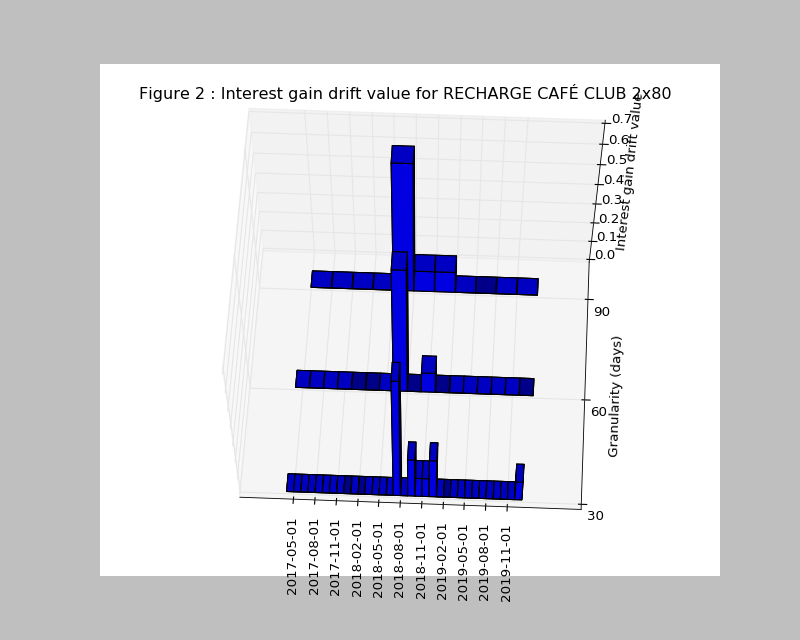

In [92]:
%matplotlib notebook
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')
plt.style.use('classic')
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')




ax1.bar3d(a["x"],a["y"],a["z"],a["dx"],a["dy"],a["dz"], shade=True)
plt.xticks(rotation=90)
# ax1.set_xlabel('period',y=-1)
ax1.set_ylabel('Granularity (days)')
ax1.set_zlabel('Interest gain drift value',y=-1)

ax1.set_xticks(a[a.granularity=="3M"]["x"].unique())
ax1.set_xticklabels(a[a.granularity=='3M'].period_y.unique())

ax1.set_yticks([30,60,90])
ax1.set_title(f"Figure 2 : Interest gain drift value for {product_name}  ")

from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
import numpy as np

def save():
    plt.savefig('plot.png')

# pop = Tk()


# plot_canvas = FigureCanvasTkAgg(fig, master=pop)
# plot_canvas.draw()

# toolbar = NavigationToolbar2Tk(plot_canvas, pop)
# toolbar.update()
# plot_canvas.get_tk_widget().pack(side=TOP, fill=Y)

# b = Button(pop, text="SAVE", bg="red", fg = 'white', command=save)
# b.pack()
plt.rcParams.update({'font.size': 20})

# pop.mainloop()

In [93]:
save()

In [90]:
a.loc[32,"dz"]=0.111111

In [91]:
a[a.granularity=="M"]

,period_y,interest_gain,granularity,dz,dy,z,y,dx,x
0,2017-04-01,0.000000,M,0.000000,5,0,30,30,-30
1,2017-05-01,0.000000,M,0.000000,5,0,30,30,0
2,2017-06-01,0.000000,M,0.000000,5,0,30,30,31
3,2017-07-01,0.000000,M,0.000000,5,0,30,30,61
4,2017-08-01,0.000000,M,0.000000,5,0,30,30,92
5,2017-09-01,0.000000,M,0.000000,5,0,30,30,123
6,2017-10-01,0.000000,M,0.000000,5,0,30,30,153
7,2017-11-01,0.000000,M,0.000000,5,0,30,30,184
8,2017-12-01,0.000000,M,0.000000,5,0,30,30,214
9,2018-01-01,0.000000,M,0.000000,5,0,30,30,245


In [17]:
interest_gain()

,period_y,interest_gain,granularity,dz
0,2017-04-01,0.000000,M,0.000000
1,2017-05-01,0.000000,M,0.000000
2,2017-06-01,0.000000,M,0.000000
3,2017-07-01,0.000000,M,0.000000
4,2017-08-01,0.000000,M,0.000000
5,2017-09-01,0.000000,M,0.000000
6,2017-10-01,0.000000,M,0.000000
7,2017-11-01,0.000000,M,0.000000
8,2017-12-01,0.000000,M,0.000000
9,2018-01-01,0.000000,M,0.000000


In [15]:
links.user_id.apply(len).sort_values(ascending=False)

286676    59
325897    56
205387    56
370407    55
263389    54
          ..
189874     1
190339     1
190373     1
200482     1
0          1
Name: user_id, Length: 408389, dtype: int64

In [4]:
# Draft 

In [38]:
# Apriori for links' users
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit_transform(links[links.user_id.apply(len)>5].user_id)
df = pd.DataFrame(te_ary, columns=te.columns_)
result= apriori(df, min_support=0.02,use_colnames=True)
result

,support,itemsets
0,0.032939,(1061637)
1,0.020355,(107030)
2,0.041081,(108938)
3,0.052924,(1095891)
4,0.022946,(110899)
...,...,...
3221,0.022206,"(1168767, 616689, 1163691, 156634, 957469, 427..."
3222,0.022206,"(1168767, 616689, 156634, 957469, 427096, 1198..."
3223,0.022206,"(1168767, 421137, 616689, 156634, 957469, 4270..."
3224,0.023316,"(1168767, 616689, 156634, 483533, 957469, 4270..."


In [53]:
customers  = frozenset([str(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])
users[users.user_id.apply(lambda x : x in customers)]

,user_id,sex,age,departement


In [87]:
links[(links.user_id.apply(lambda x : len(customers.intersection(x))>2))&(links.itemsets_y.apply(lambda x : 1538 in x ))].period_y

1261277    2019-05-01
1263010    2019-05-01
1265417    2019-05-01
1261281    2019-05-01
1263016    2019-05-01
1265421    2019-05-01
897682     2018-08-01
918567     2018-08-01
922614     2018-08-01
1172171    2019-02-01
1172433    2019-02-01
1172587    2019-02-01
1398271    2019-11-01
1398405    2019-11-01
1398480    2019-11-01
1344695    2019-08-01
1345039    2019-08-01
1345064    2019-08-01
1345077    2019-08-01
1346975    2019-08-01
1347320    2019-08-01
1347487    2019-08-01
1346976    2019-08-01
1347321    2019-08-01
1347488    2019-08-01
897684     2018-08-01
918569     2018-08-01
922616     2018-08-01
660173     2018-05-01
1088154    2018-11-01
1089025    2018-11-01
1089128    2018-11-01
1088156    2018-11-01
1089027    2018-11-01
1089130    2018-11-01
1261267    2019-05-01
1262998    2019-05-01
1265400    2019-05-01
660195     2018-05-01
1172155    2019-02-01
1172417    2019-02-01
1172575    2019-02-01
1261269    2019-05-01
1263000    2019-05-01
1265403    2019-05-01
1398269   

In [111]:
res = []
links[links.user_id.apply(lambda x : customers.intersection(x)!=set())].apply(lambda x : [[res.append((user,x["period_x"],product)) for user in x["user_id"] if user in customers]for product in x["itemsets_x"] ],axis=1)

4370              [[None]]
4667              [[None]]
27039             [[None]]
40795       [[None, None]]
40799       [[None, None]]
                ...       
398644    [[None], [None]]
399627            [[None]]
403431            [[None]]
403585            [[None]]
403603    [[None], [None]]
Length: 1100, dtype: object

In [136]:
a = pd.DataFrame(res,columns=["user","period","product"]).groupby("user").product.apply(set).to_frame()

In [137]:
a

,product
user,
1095891,"{1538, 163, 454, 4142, 4112, 1715, 5845, 1622,..."
114666,"{608, 1538, 163, 3876, 6855, 2797, 1615, 4112,..."
1168767,"{1538, 163, 6907, 454, 3274, 2317, 4112, 4149,..."
156634,"{1538, 163, 4074, 2797, 4143, 4916, 4159, 1531..."
421137,"{1538, 163, 4074, 4112, 4917, 4149, 5625, 1531..."
427096,"{2369, 1538, 163, 386, 2723, 2797, 1710, 4916,..."
616689,"{3899, 1538, 163, 2756, 4112, 4917, 4149, 5625..."
751640,"{1538, 6671, 2968, 163, 5806, 4916, 4149, 6069..."
957469,"{5952, 1538, 163, 1795, 3880, 4112, 721, 5490,..."


In [3]:
groups = read_group(file_name)
customers  = frozenset([int(i) for i in {'1168767', '421137', '616689', '156634', '957469', '427096', '114666', '1095891', '751640'}])

In [4]:
res = []
groups[groups.user_ids.apply(lambda x :customers.intersection(x)!=set() )].apply(lambda x : [res.append((x["period"],i)) for i in x["itemsets"]],axis=1)
res = pd.DataFrame(res,columns=["period","product"])

In [10]:
res.groupby("product").period.nunique().sort_values(ascending=False)

product
163     34
1538    18
1622     6
4112     6
4149     5
        ..
4143     1
4142     1
6907     1
3880     1
3899     1
Name: period, Length: 61, dtype: int64

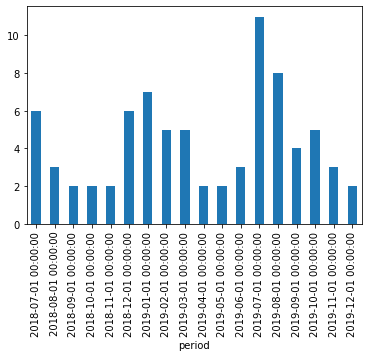

In [17]:
groups[(groups.user_ids.apply(lambda x :customers.intersection(x)!=set()))&(groups.itemsets.apply(lambda x : 1538 in x ))].groupby("period").size().plot.bar()

In [ ]:
groups[groups.itemsets.apply(lambda x : 1538 in x)]